# Initialize

In [1]:
visible_devices = [0]
from datetime import datetime
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing os...")
import os
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing sys...")
import sys
if not any("ipykernel" in arg for arg in sys.argv):
    print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing and initializing argparse...")
    import argparse
    parser = argparse.ArgumentParser()
    parser.add_argument("-v", "--visible_devices", help="Set visible devices", nargs='*', type=list, default=visible_devices)
    args = parser.parse_args()
    visible_devices = args.visible_devices if args.visible_devices else visible_devices
    if not isinstance(visible_devices, list):
        raise ValueError("Visible devices must be a list of integers")
    for i in visible_devices:
        if not isinstance(i, int):
            raise ValueError("Visible devices must be a list of integers")
print("Visible devices:", visible_devices)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timer from timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting env variables for tf import (only device(s)", visible_devices, "will be available)...")
os.environ["CUDA_VISIBLE_DEVICES"] = ','.join([str(i) for i in visible_devices]) # type: ignore
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
#os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing numpy...")
import numpy as np
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing matplotlib...")
from matplotlib import pyplot as plt
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing h5py...")
import h5py
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing importlib.util...")
import importlib.util
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing json...")
import json
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing pandas...")
import pandas as pd
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing random...")
import random
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing scipy utils...")
from scipy.stats import norm, lognorm, chi2, kstwo, kstwobign, ks_2samp, moment
from scipy.special import kolmogorov
from scipy.optimize import minimize, curve_fit, root, bisect
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing subprocess...")
import subprocess
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow...")
import tensorflow as tf # type: ignore
print("Tensorflow version:", tf.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tensorflow_probability...")
import tensorflow_probability as tfp # type: ignore
tfd = tfp.distributions
print("Tensorflow probability version:", tfp.__version__)
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing timeit...")
from timeit import default_timer as timer
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing tqdm...")
from tqdm import tqdm
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing typing...")
from typing import List, Tuple, Dict, Callable, Union, Optional, Any, Type
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Setting tf configs...")
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for gpu_device in gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_device, True)

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing GMetrics module...")

sys.path.insert(0,'../utils_func/')
import MixtureDistributions # type: ignore

sys.path.insert(0,'../')
import GMetrics # type: ignore
from GMetrics.utils import se_mean, se_std, compute_exclusion_bisection, compute_exclusion_LR_bisection, save_update_metrics_config # type: ignore

print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "Importing jetnet.evaluation.gen_metrics module...")
from jetnet.evaluation import gen_metrics as JMetrics # type: ignore

def get_gpu_info():
    try:
        gpu_info = subprocess.check_output(["nvidia-smi", "--query-gpu=gpu_name", "--format=csv,noheader"]).decode('utf-8')
        return gpu_info.strip().split('\n')
    except Exception as e:
        print(e)
        return None
training_devices = []
gpu_models = get_gpu_info()
for i in visible_devices:
    if gpu_models:
        training_devices.append(gpu_models[i])
        print(f"Successfully loaded GPU #{i}, model: {gpu_models[i]}")
    else:
        training_devices.append('undetermined')
        print(f"Failed to load GPU {i} model. Defaulting to 'undetermined'.")
print(f"Loaded {len(training_devices)} GPUs: {training_devices}")
    
results_dir = "../results_leonardo/"
if not os.path.exists(results_dir):
    print("WARNING: Results directory does not exist")
    
print(datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")+":", "All done.")

2024-04-11 17:01:23.166573: Importing os...
2024-04-11 17:01:23.166876: Importing sys...
Visible devices: [0]
2024-04-11 17:01:23.167115: Importing timer from timeit...
2024-04-11 17:01:23.167183: Setting env variables for tf import (only device(s) [0] will be available)...
2024-04-11 17:01:23.167308: Importing numpy...
2024-04-11 17:01:23.266603: Importing matplotlib...
2024-04-11 17:01:23.610197: Importing h5py...
2024-04-11 17:01:23.633105: Importing importlib.util...
2024-04-11 17:01:23.633203: Importing json...
2024-04-11 17:01:23.633265: Importing pandas...
2024-04-11 17:01:24.058344: Importing random...
2024-04-11 17:01:24.058477: Importing scipy utils...
2024-04-11 17:01:24.422925: Importing subprocess...
2024-04-11 17:01:24.423057: Importing tensorflow...
Tensorflow version: 2.16.1
2024-04-11 17:01:27.776640: Importing tensorflow_probability...
Tensorflow probability version: 0.24.0
2024-04-11 17:01:28.920309: Importing timeit...
2024-04-11 17:01:28.920404: Importing tqdm...
2

/leonardo/home/userexternal/rtorre00/fast/rtorre00/envs/tf2_custom/lib/python3.11/site-packages/jetnet/utils/utils.py:7: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


2024-04-11 17:01:33.634733: Importing jetnet.evaluation.gen_metrics module...
Successfully loaded GPU #0, model: NVIDIA A100-SXM-64GB
Loaded 1 GPUs: ['NVIDIA A100-SXM-64GB']
2024-04-11 17:01:33.667503: All done.


# Fixed $n=100000$

## Null hypotheses

### Model definition

In [2]:
seed = 0
ncomp = 3
ndims = 5
niter = 10_000
batch_size_test = 100_000
eps_loc = 0.
eps_scale = 0.
dist_1 = MixtureDistributions.MixtureGaussian(ncomp, ndims, 0., 0., seed)
dist_2 = MixtureDistributions.MixtureGaussian(ncomp, ndims, eps_loc, eps_scale, seed)
print(dist_1.dtype, dist_2.dtype)
print('Types of distributions: ', type(dist_1), type(dist_2))
print('Dtypes of distributions: ', dist_1.dtype, dist_2.dtype)
print('Batch shapes of distributions: ', dist_1.batch_shape, dist_2.batch_shape)
print('Event shapes of distributions: ', dist_1.event_shape, dist_2.event_shape)

<dtype: 'float64'> <dtype: 'float64'>
Types of distributions:  <class 'tensorflow_probability.python.distributions.mixture.Mixture'> <class 'tensorflow_probability.python.distributions.mixture.Mixture'>
Dtypes of distributions:  <dtype: 'float64'> <dtype: 'float64'>
Batch shapes of distributions:  () ()
Event shapes of distributions:  (5,) (5,)


In [3]:
model_dir = results_dir + str(ndims) + "D_" + str(int(batch_size_test/1000)) + "K/"
if os.path.exists(model_dir):
    print("Model directory exists")
else:
    os.makedirs(model_dir)
    print("Model directory was created")
null_hypotheses_dir = model_dir + "null_hypothesis/"
if os.path.exists(null_hypotheses_dir):
    print("Null hypothesis directory exists")
else:
    os.makedirs(null_hypotheses_dir)
    print("Null hypothesis directory was created")
metrics_config_file = model_dir + "metrics_config.json"

Model directory exists
Null hypothesis directory exists


In [4]:
TwoSampleTestInputs = GMetrics.TwoSampleTestInputs(dist_1_input = dist_1,
                                                   dist_2_input = dist_2,
                                                   niter = niter,
                                                   batch_size_test = batch_size_test,
                                                   batch_size_gen = 10_000,
                                                   small_sample_threshold = 1e7,
                                                   dtype_input = tf.float64,
                                                   seed_input = 0,
                                                   use_tf = True,
                                                   mirror_strategy = False,
                                                   verbose = True)
print("nsamples",TwoSampleTestInputs.nsamples)
print("batch_size",TwoSampleTestInputs.batch_size_test)
print("niter",TwoSampleTestInputs.niter)
print("niter * batch_size",TwoSampleTestInputs.niter*TwoSampleTestInputs.batch_size_test)
print("small_sample",TwoSampleTestInputs.small_sample)

Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.


Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
nsamples 1000000000
batch_size 100000
niter 10000
niter * batch_size 1000000000
small_sample False


In [5]:
FNMetric = GMetrics.FNMetric(TwoSampleTestInputs,
                             progress_bar = True,
                             verbose = True)
KSTest = GMetrics.KSTest(TwoSampleTestInputs,
                         progress_bar = True,
                         verbose = True)
SKSTest = GMetrics.SKSTest(TwoSampleTestInputs,
                           nslices = 100,
                           seed_slicing = 0,
                           progress_bar = True,
                           verbose = True)
SWDMetric = GMetrics.SWDMetric(TwoSampleTestInputs,
                               nslices = 100,
                               seed_slicing = 0,
                               progress_bar = True,
                               verbose = True)
FPDMetric = GMetrics.FPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               #min_samples_input = 20_000,
                               #max_samples_input = 50_000,
                               num_batches = 20)
KPDMetric = GMetrics.KPDMetric(TwoSampleTestInputs,
                               progress_bar = True,
                               verbose = True,
                               degree = 4,
                               block_size = 5_000,
                               num_batches = 1,
                               batch_size = 100_000)
LRMetric = GMetrics.LRMetric(TwoSampleTestInputs,
                             null_test=True,
                             verbose = True)

Generating random directions based on nslices, ndims, and seed_slicing.
Generating random directions based on nslices, ndims, and seed_slicing.
To run under the alternative hypothesis, set the `null_test` attribute to False.


### Set up tests and metrics configurations

In [6]:
test_config_null = {}
test_config_tmp = dict(TwoSampleTestInputs.__dict__)
keys_to_remove = ["_dist_1_input", "_dist_2_input", "_dist_1_num", "_dist_2_num", "_dist_1_symb", "_dist_2_symb", "_seed_generator"]
for key in keys_to_remove:
    test_config_tmp.pop(key, None)
for key, value in test_config_tmp.items():
    new_key = key.lstrip('_')
    
    if isinstance(value, tf.Tensor):
        new_value = value.numpy() # type: ignore
    elif isinstance(value, np.ndarray):
        new_value = value.tolist()
    elif isinstance(value, np.generic):
        new_value = value.item() # Convert NumPy scalars to Python scalars
    elif isinstance(value, tf.DType):
        new_value = value.name
    elif isinstance(value, np.dtype):
        new_value = np.dtype(value).name
    else:
        new_value = value
    
    test_config_null[new_key] = new_value

test_config_null["ncomp"] = ncomp

pd.DataFrame([test_config_null])

,niter,batch_size_test,batch_size_gen,small_sample_threshold,dtype_input,seed,use_tf,mirror_strategy,strategy,verbose,...,ndims_1,nsamples_1,is_symb_2,ndims_2,nsamples_2,dtype,ndims,nsamples,small_sample,ncomp
0,10000,100000,10000,10000000,float64,0,True,False,None,True,...,5,0,True,5,0,float64,5,1000000000,False,3


In [7]:
unique_key = "config_ndims_"+str(TwoSampleTestInputs.ndims)+"_ncop_"+str(ncomp)+"_nsamples_"+str(TwoSampleTestInputs.batch_size_test)+"_niter_"+str(TwoSampleTestInputs.niter)
metrics_config = {unique_key: {"fn": {"name": "fn", # type: ignore
                                      "object_name": "FNMetric",
                                      "class_name": "GMetrics.FNMetric",
                                      "kwargs": {},
                                      "result_key": "metric_list", 
                                      "scale_func": lambda ns, ndims: np.sqrt(ns)/ndims,
                                      "scale_func_string": "lambda ns, ndims: np.sqrt(ns)/ndims",
                                      "test_config": test_config_null,
                                      "max_vectorize": 500, # optimized for 5D
                                      "latex": "$\overline{\|\cdot\|}_{F}$",
                                      "null_file": null_hypotheses_dir+"FN.json"},
                               "fpd": {"name": "fpd",
                                       "object_name": "FPDMetric",
                                       "class_name": "GMetrics.FPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#(ns/ndims)**(3/2),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 100, # optimized for 5D
                                       "latex": "$d_{\mathrm{FPD}}$",
                                       "null_file": null_hypotheses_dir+"FPD.json"},
                               "kpd": {"name": "kpd",
                                       "object_name": "KPDMetric" ,
                                       "class_name": "GMetrics.KPDMetric",
                                       "kwargs": {},
                                       "result_key": "metric_list", 
                                       "scale_func": lambda ns, ndims: 10000,#ns/np.sqrt(ndims),
                                       "scale_func_string": "lambda ns, ndims: 10000",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1, # optimized for 5D
                                       "latex": "$d_{\mathrm{KPD}}$",
                                       "null_file": null_hypotheses_dir+"KPD.json"},
                               "ks":  {"name": "ks",
                                       "object_name": "KSTest",
                                       "class_name": "GMetrics.KSTest", 
                                       "kwargs": {},
                                       "result_key": "statistic_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 1000,
                                       "latex": "$\overline{D}$",
                                       "null_file": null_hypotheses_dir+"KS.json"},
                               "sks": {"name": "sks",
                                       "object_name": "SKSTest",
                                       "class_name": "GMetrics.SKSTest", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, _ : np.sqrt(ns),
                                       "scale_func_string": "lambda ns, _: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{D}$",
                                       "null_file": null_hypotheses_dir+"SKS.json"},
                               "swd": {"name": "swd",
                                       "object_name": "SWDMetric",
                                       "class_name": "GMetrics.SWDMetric", 
                                       "kwargs": {"nslices": 100, "seed_slicing": 0},
                                       "result_key": "metric_means", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns/ndims),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns/ndims)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 50,
                                       "latex": "$\widetilde{W}$",
                                       "null_file": null_hypotheses_dir+"SWD.json"},
                               "lr": {"name": "lr",
                                       "object_name": "LRMetric",
                                       "class_name": "GMetrics.LRMetric", 
                                       "kwargs": {"null_test": True},
                                       "result_key": "lik_ratio_norm_list", 
                                       "scale_func": lambda ns, ndims: np.sqrt(ns),
                                       "scale_func_string": "lambda ns, ndims: np.sqrt(ns)",
                                       "test_config": test_config_null,
                                       "max_vectorize": 200,
                                       "latex": "$t_{\mu}$",
                                       "null_file": null_hypotheses_dir+"LR.json"}}}
metrics_config[unique_key]

{'fn': {'name': 'fn',
  'object_name': 'FNMetric',
  'class_name': 'GMetrics.FNMetric',
  'kwargs': {},
  'result_key': 'metric_list',
  'scale_func': <function __main__.<lambda>(ns, ndims)>,
  'scale_func_string': 'lambda ns, ndims: np.sqrt(ns)/ndims',
  'test_config': {'niter': 10000,
   'batch_size_test': 100000,
   'batch_size_gen': 10000,
   'small_sample_threshold': 10000000,
   'dtype_input': 'float64',
   'seed': 0,
   'use_tf': True,
   'mirror_strategy': False,
   'strategy': None,
   'verbose': True,
   'is_symb_1': True,
   'ndims_1': 5,
   'nsamples_1': 0,
   'is_symb_2': True,
   'ndims_2': 5,
   'nsamples_2': 0,
   'dtype': 'float64',
   'ndims': 5,
   'nsamples': 1000000000,
   'small_sample': False,
   'ncomp': 3},
  'max_vectorize': 500,
  'latex': '$\\overline{\\|\\cdot\\|}_{F}$',
  'null_file': '../results_leonardo/5D_100K/null_hypothesis/FN.json'},
 'fpd': {'name': 'fpd',
  'object_name': 'FPDMetric',
  'class_name': 'GMetrics.FPDMetric',
  'kwargs': {},
  'result_

### Evaluate null hypotheses

In [8]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    file = metric["null_file"]
    name = metric["name"]
    max_vectorize = metric["max_vectorize"]
    obj = eval(metric["object_name"])
    if os.path.exists(file):
        print(f"Loading {name} from {file}")
        obj.Results.load_from_json(file)
    else:
        print(f"Computing and savng {name} with max_vectorize = {max_vectorize}")
        obj.Test_tf(max_vectorize=max_vectorize)
        print(f"Saving {name} to {file}")
        obj.Results.save_to_json(file)

Loading fn from ../results_leonardo/5D_100K/null_hypothesis/FN.json
Loading fpd from ../results_leonardo/5D_100K/null_hypothesis/FPD.json
Computing and savng kpd with max_vectorize = 1

------------------------------------------
Starting KPD metric calculation...
Running TF KPD calculation...
niter = 10000
batch_size = 100000
The dist_1_num tensor is empty. Batches will be generated 'on-the-fly' from dist_1_symb.
The dist_2_num tensor is empty. Batches will be generated 'on-the-fly' from dist_2_symb.
nchunks = 10000
Iterating from 0 to 1 out of 10000 .


I0000 00:00:1712847697.641243  370086 service.cc:145] XLA service 0xb8de6970 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712847697.641286  370086 service.cc:153]   StreamExecutor device (0): NVIDIA A100-SXM-64GB, Compute Capability 8.0
W0000 00:00:1712847697.701114  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_1/Assert/Assert
W0000 00:00:1712847697.704893  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_3/Assert/Assert
W0000 00:00:1712847697.705807  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_5/Assert/Assert
W0000 00:00:1712847697.706116  370086 assert_op.cc:38] Ignoring Assert operator while/Mixture_CONSTRUCTED_AT_top_level/sample/assert_equal_7/Assert/Assert
W0000 00:00:1712847697.707024  370086 assert_op.cc:38] Ignoring Assert operator while/M

Computing (Tensor("while/Placeholder:0", shape=(), dtype=int32),Tensor("while/while/Placeholder:0", shape=(), dtype=int32)) component
Iterating from 1 to 2 out of 10000 .
Iterating from 2 to 3 out of 10000 .
Iterating from 3 to 4 out of 10000 .
Iterating from 4 to 5 out of 10000 .
Iterating from 5 to 6 out of 10000 .
Iterating from 6 to 7 out of 10000 .
Iterating from 7 to 8 out of 10000 .
Iterating from 8 to 9 out of 10000 .
Iterating from 9 to 10 out of 10000 .
Iterating from 10 to 11 out of 10000 .
Iterating from 11 to 12 out of 10000 .
Iterating from 12 to 13 out of 10000 .
Iterating from 13 to 14 out of 10000 .
Iterating from 14 to 15 out of 10000 .
Iterating from 15 to 16 out of 10000 .
Iterating from 16 to 17 out of 10000 .
Iterating from 17 to 18 out of 10000 .
Iterating from 18 to 19 out of 10000 .
Iterating from 19 to 20 out of 10000 .
Iterating from 20 to 21 out of 10000 .
Iterating from 21 to 22 out of 10000 .
Iterating from 22 to 23 out of 10000 .
Iterating from 23 to 24 o

In [9]:
cl_list = [0.68, 0.95, 0.99]
null_times = []

for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    
    nsamples = obj.Inputs.batch_size_test
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)

    metric_thresholds = [[cl, 
                          [int(cl*len(dist_null)), 
                           int((1-cl)*len(dist_null))], 
                          np.sort(dist_null)[int(len(dist_null)*cl)]] for cl in cl_list]
    print(f"ThresholdS for metric {metric['name']}: {metric_thresholds}")
    null_time = obj.Results[-1].__dict__['computing_time']
    null_times.append([name, int(null_time)])
    print(f"Computing time for metric {metric['name']}: {null_time}")
    
    metric.update({"thresholds": metric_thresholds})
    
metrics_config[unique_key]["lr"]["thresholds"] = []

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

ThresholdS for metric fn: [[0.68, [6800, 3199], 0.7311931613101769], [0.95, [9500, 500], 1.2152135086781035], [0.99, [9900, 100], 1.5590543375150292]]
Computing time for metric fn: 33.18956989585422
ThresholdS for metric fpd: [[0.68, [6800, 3199], 0.3721655670741698], [0.95, [9500, 500], 0.4101249406132395], [0.99, [9900, 100], 0.4512487853491462]]
Computing time for metric fpd: 270.10692294710316
ThresholdS for metric kpd: [[0.68, [6800, 3199], -0.07877539754373998], [0.95, [9500, 500], -0.011921334883213675], [0.99, [9900, 100], 0.028590647968884664]]
Computing time for metric kpd: 30466.033751571085
ThresholdS for metric ks: [[0.68, [6800, 3199], 0.9199168115783043], [0.95, [9500, 500], 1.1323405345344149], [0.99, [9900, 100], 1.284396397308672]]
Computing time for metric ks: 102.95067132893018
ThresholdS for metric sks: [[0.68, [6800, 3199], 0.9117351041017392], [0.95, [9500, 500], 1.1124223535563071], [0.99, [9900, 100], 1.265660243663076]]
Computing time for metric sks: 786.86756

,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f87e7259800>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",500,$\overline{\|\cdot\|}_{F}$,../results_leonardo/5D_100K/null_hypothesis/FN...,"[[0.68, [6800, 3199], 0.7311931613101769], [0...."
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f87e72598a0>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 100000, 'b...",100,$d_{\mathrm{FPD}}$,../results_leonardo/5D_100K/null_hypothesis/FP...,"[[0.68, [6800, 3199], 0.3721655670741698], [0...."
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f87e725aca0>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 100000, 'b...",1,$d_{\mathrm{KPD}}$,../results_leonardo/5D_100K/null_hypothesis/KP...,"[[0.68, [6800, 3199], -0.07877539754373998], [..."
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f87e725afc0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{D}$,../results_leonardo/5D_100K/null_hypothesis/KS...,"[[0.68, [6800, 3199], 0.9199168115783043], [0...."
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f87e725b060>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",50,$\widetilde{D}$,../results_leonardo/5D_100K/null_hypothesis/SK...,"[[0.68, [6800, 3199], 0.9117351041017392], [0...."
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f87e725b100>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",50,$\widetilde{W}$,../results_leonardo/5D_100K/null_hypothesis/SW...,"[[0.68, [6800, 3199], 0.6889382599299374], [0...."
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f87e725b1a0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",200,$t_{\mu}$,../results_leonardo/5D_100K/null_hypothesis/LR...,[]


### Plots of null-distributions

mu = 0.6516939997710277 +/- 0.0008453544464860177
sigma = 0.2907497973320046 +/- 0.0027147626221840793


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


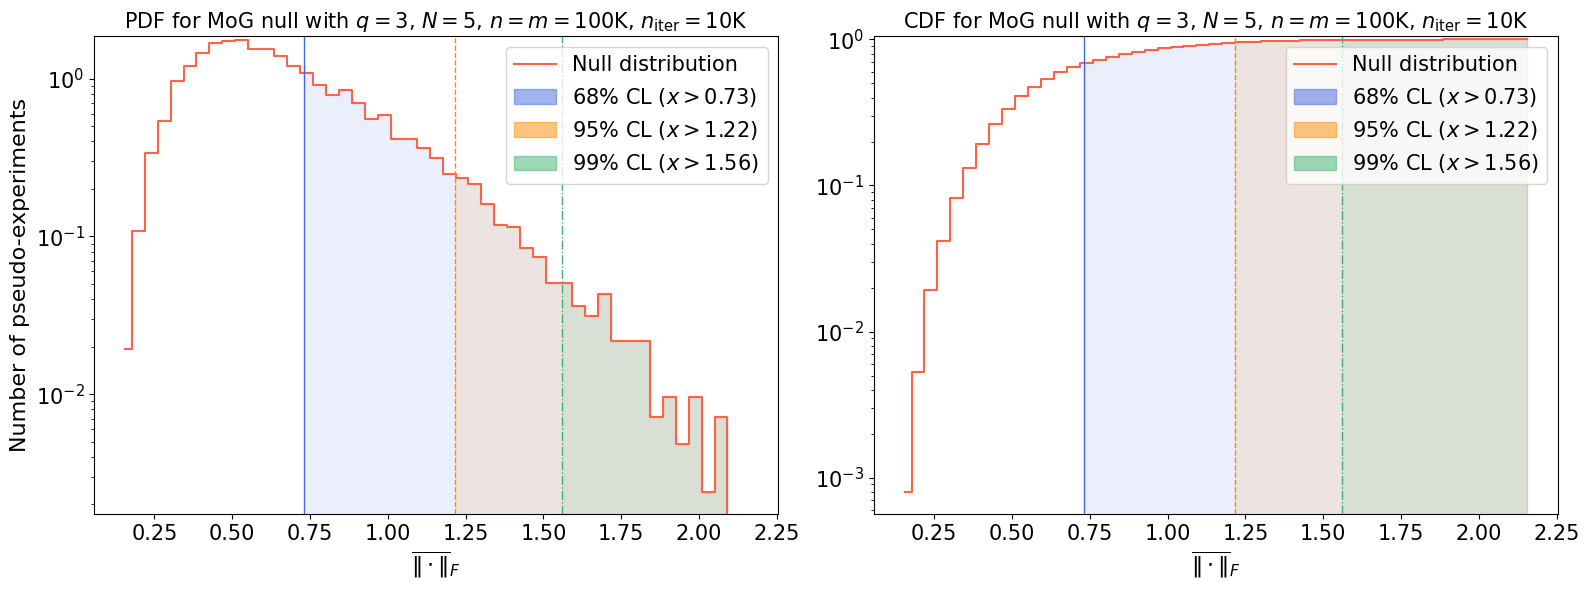

Time elapsed: 1.5198449280578643 seconds.
mu = 0.37037236579175314 +/- 4.298580003632062e-06
sigma = 0.020733017155329953 +/- 0.000367371551416249


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


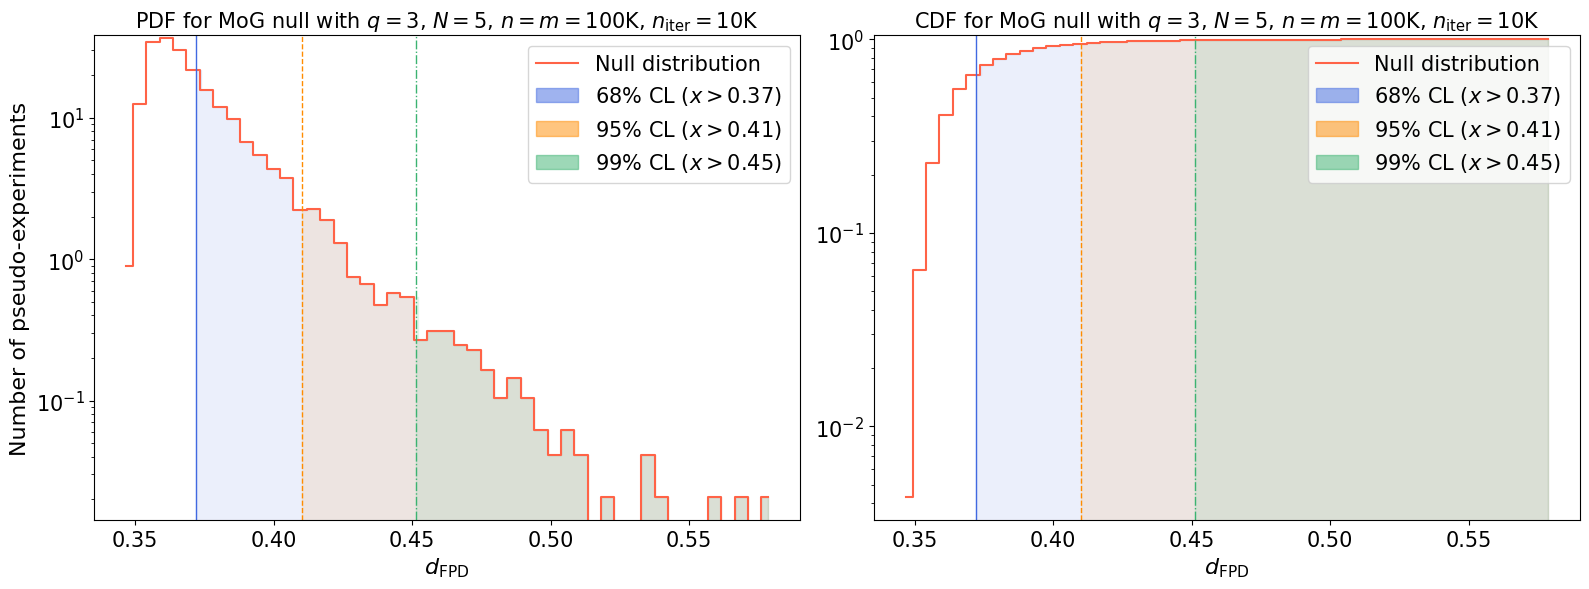

Time elapsed: 0.9528770609758794 seconds.
mu = -0.10200337186971595 +/- 2.866492800349496e-05
sigma = 0.05353963765612815 +/- 0.0003878556341894495


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


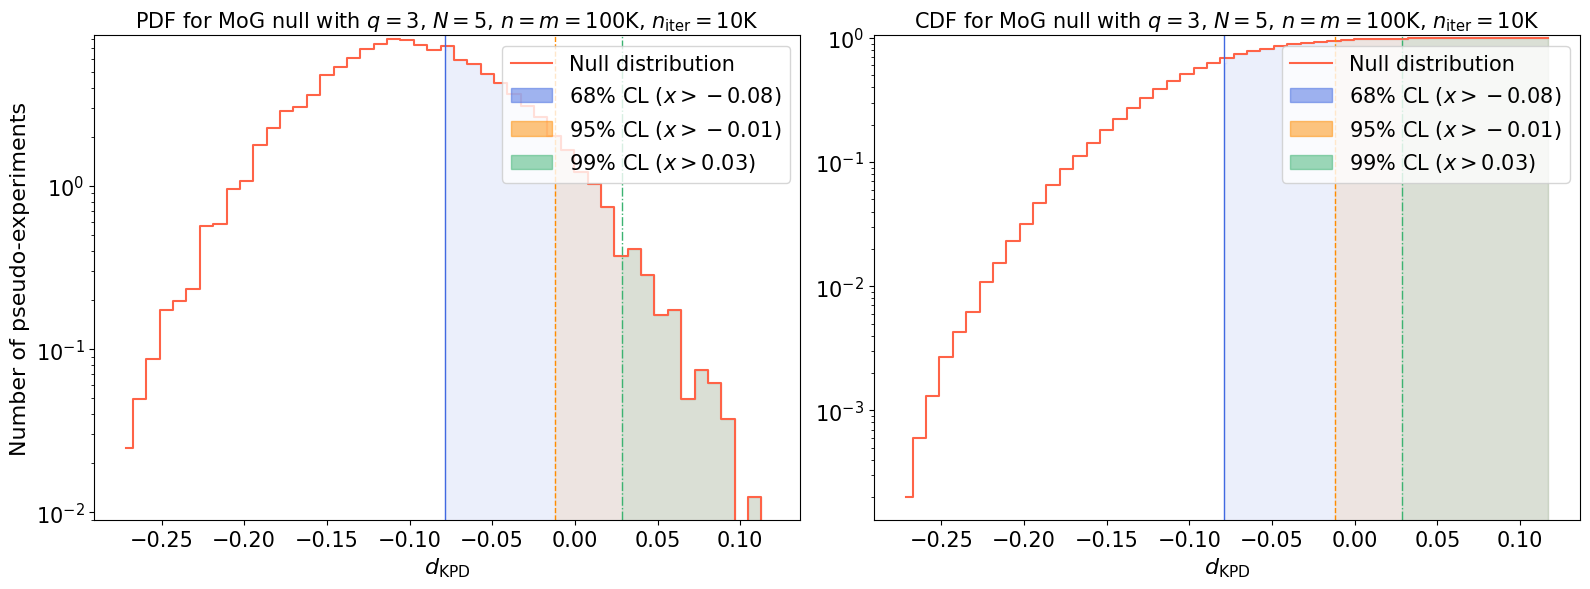

Time elapsed: 1.0227291870396584 seconds.
mu = 0.8693149240841894 +/- 0.00020805869243534366
sigma = 0.14424239752421744 +/- 0.0012550704659856392


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


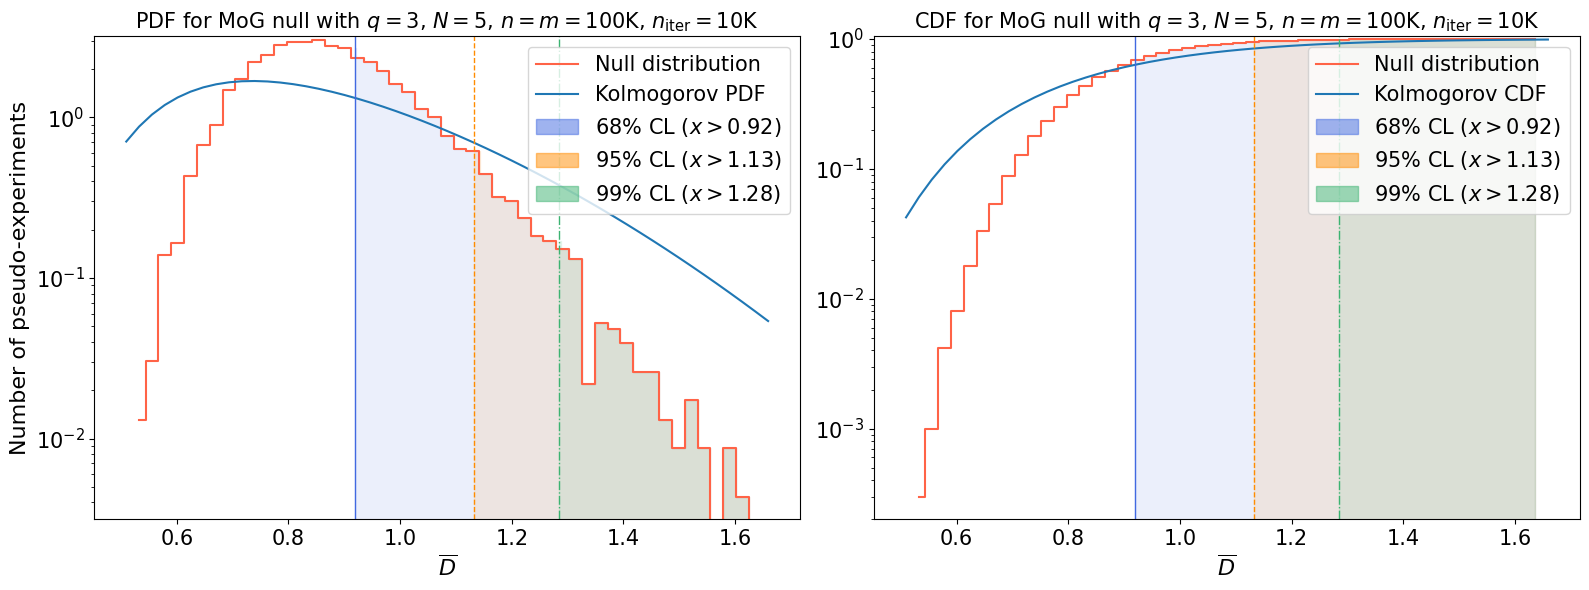

Time elapsed: 1.35298205120489 seconds.
mu = 0.8689293527700909 +/- 0.00017416942795426158
sigma = 0.1319732654571605 +/- 0.001199891859395542


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


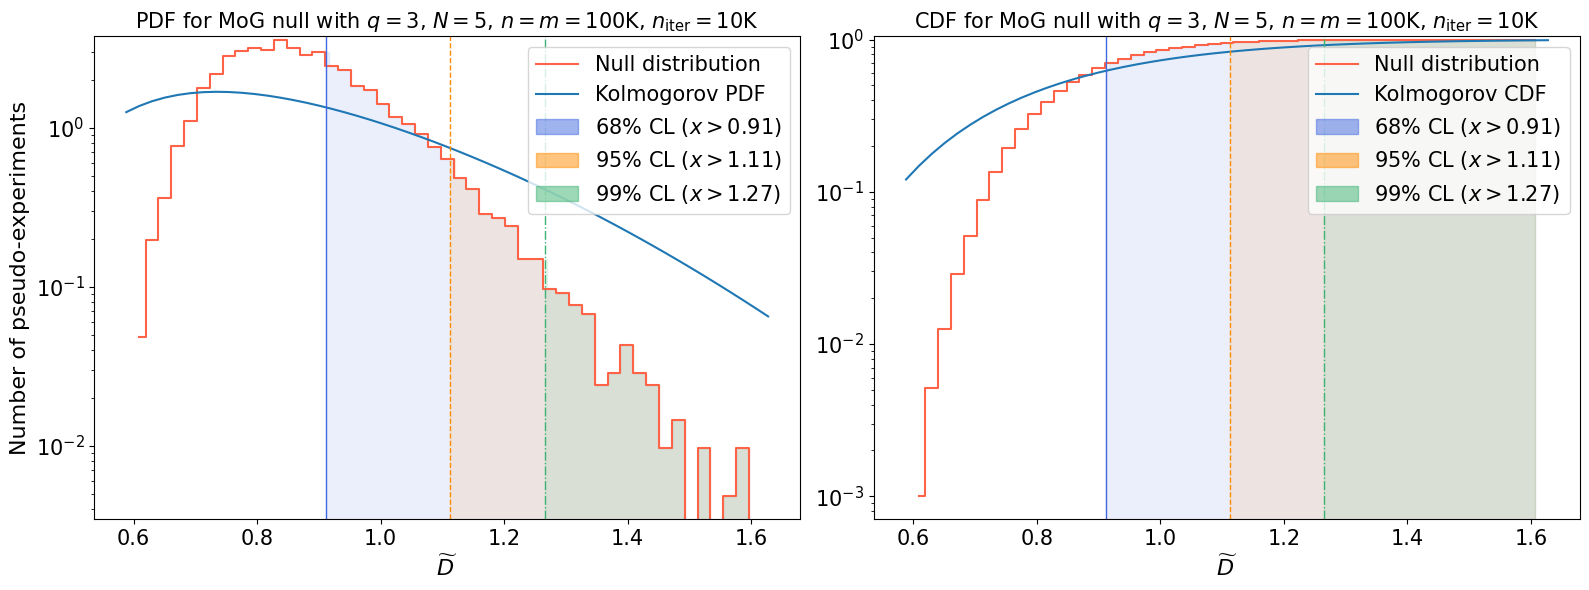

Time elapsed: 1.3584744611289352 seconds.
mu = 0.6350235360487639 +/- 0.00034087011831206317
sigma = 0.18462668233818838 +/- 0.0017387793214599034


/tmp/ipykernel_370086/1823599339.py:78: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[0].set_ylim(current_ylim0)
/tmp/ipykernel_370086/1823599339.py:80: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend0.legendHandles[-3:]:
/tmp/ipykernel_370086/1823599339.py:117: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax[1].set_ylim(current_ylim1)
/tmp/ipykernel_370086/1823599339.py:123: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend1.legendHandles[-3:]:


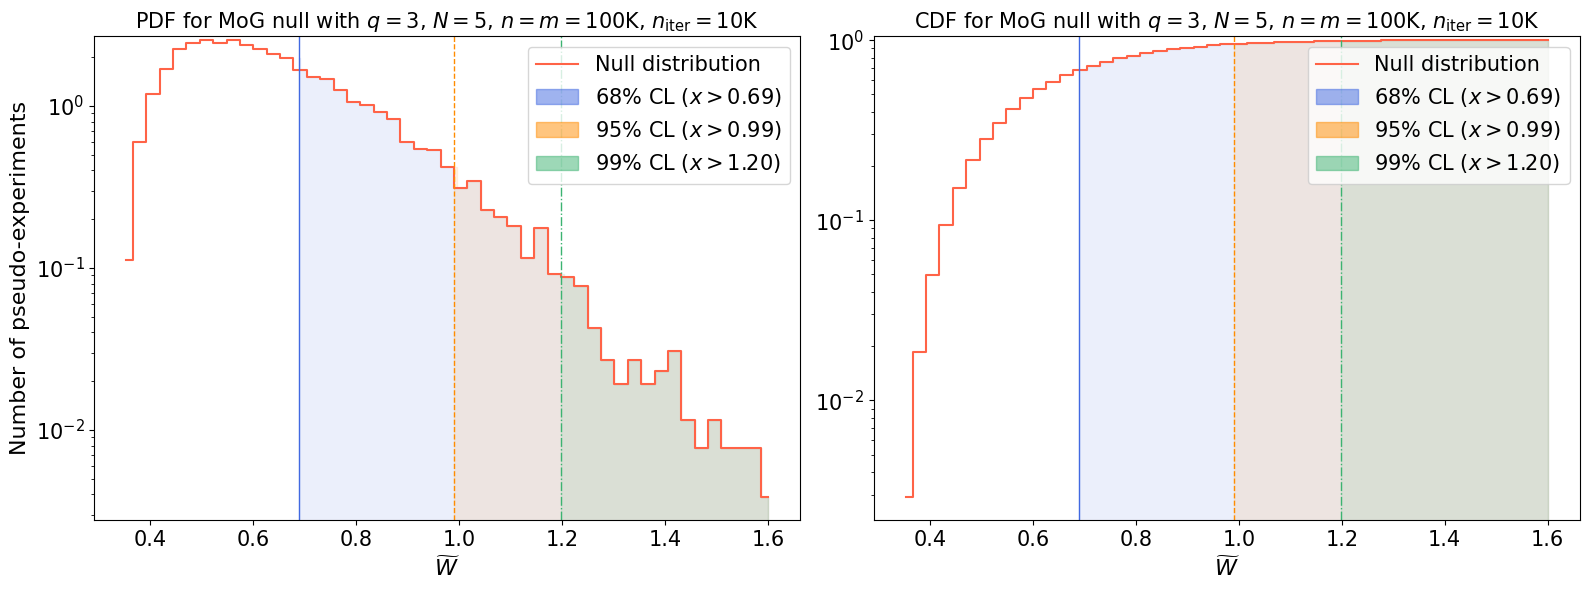

Time elapsed: 4.226057433988899 seconds.


,name,object_name,class_name,kwargs,result_key,scale_func,scale_func_string,test_config,max_vectorize,latex,null_file,thresholds,null_figure
0,fn,FNMetric,GMetrics.FNMetric,{},metric_list,<function <lambda> at 0x7f87e7259800>,"lambda ns, ndims: np.sqrt(ns)/ndims","{'niter': 10000, 'batch_size_test': 100000, 'b...",500,$\overline{\|\cdot\|}_{F}$,../results_leonardo/5D_100K/null_hypothesis/FN...,"[[0.68, [6800, 3199], 0.7311931613101769], [0....",../results_leonardo/5D_100K/null_hypothesis/FN...
1,fpd,FPDMetric,GMetrics.FPDMetric,{},metric_list,<function <lambda> at 0x7f87e72598a0>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 100000, 'b...",100,$d_{\mathrm{FPD}}$,../results_leonardo/5D_100K/null_hypothesis/FP...,"[[0.68, [6800, 3199], 0.3721655670741698], [0....",../results_leonardo/5D_100K/null_hypothesis/FP...
2,kpd,KPDMetric,GMetrics.KPDMetric,{},metric_list,<function <lambda> at 0x7f87e725aca0>,"lambda ns, ndims: 10000","{'niter': 10000, 'batch_size_test': 100000, 'b...",1,$d_{\mathrm{KPD}}$,../results_leonardo/5D_100K/null_hypothesis/KP...,"[[0.68, [6800, 3199], -0.07877539754373998], [...",../results_leonardo/5D_100K/null_hypothesis/KP...
3,ks,KSTest,GMetrics.KSTest,{},statistic_means,<function <lambda> at 0x7f87e725afc0>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",1000,$\overline{D}$,../results_leonardo/5D_100K/null_hypothesis/KS...,"[[0.68, [6800, 3199], 0.9199168115783043], [0....",../results_leonardo/5D_100K/null_hypothesis/KS...
4,sks,SKSTest,GMetrics.SKSTest,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f87e725b060>,"lambda ns, _: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",50,$\widetilde{D}$,../results_leonardo/5D_100K/null_hypothesis/SK...,"[[0.68, [6800, 3199], 0.9117351041017392], [0....",../results_leonardo/5D_100K/null_hypothesis/SK...
5,swd,SWDMetric,GMetrics.SWDMetric,"{'nslices': 100, 'seed_slicing': 0}",metric_means,<function <lambda> at 0x7f87e725b100>,"lambda ns, ndims: np.sqrt(ns/ndims)","{'niter': 10000, 'batch_size_test': 100000, 'b...",50,$\widetilde{W}$,../results_leonardo/5D_100K/null_hypothesis/SW...,"[[0.68, [6800, 3199], 0.6889382599299374], [0....",../results_leonardo/5D_100K/null_hypothesis/SW...
6,lr,LRMetric,GMetrics.LRMetric,{'null_test': True},lik_ratio_norm_list,<function <lambda> at 0x7f87e725b1a0>,"lambda ns, ndims: np.sqrt(ns)","{'niter': 10000, 'batch_size_test': 100000, 'b...",200,$t_{\mu}$,../results_leonardo/5D_100K/null_hypothesis/LR...,[],NaN


In [10]:
for metric in list(metrics_config[unique_key].values())[:-1]:
    name = metric["name"]
    name_cap = name.upper()
    latex = metric["latex"]
    obj = eval(metric["object_name"])
    result_key = metric["result_key"]
    scale_func = metric["scale_func"]
    figure_file = metric["null_file"].replace("json","pdf")
    thresholds = metric["thresholds"]

    start = timer()
    
    nsamples = obj.Inputs.batch_size_test
    niter = obj.Inputs.niter
    ns = nsamples**2 /(2*nsamples)
    dist_null = np.array(obj.Results[-1].result_value[result_key])*scale_func(ns, ndims)
    
    scale = 'log'
    num_bins = 50  # number of bins|
    
    mu, deltamu, sigma, deltasigma = (np.mean(dist_null), se_mean(dist_null), np.std(dist_null), se_std(dist_null))
    print("mu =", mu, "+/-", deltamu)
    print("sigma =", sigma, "+/-", deltasigma)
    
    min_x, max_x = min(dist_null), max(dist_null) # lower and upper limit of the binning
    x = np.linspace(min_x, max_x, num_bins + 1)
    counts, bin_edges = np.histogram(dist_null, bins=x, density=True)
    cum_counts = np.cumsum(counts)/np.sum(counts)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    # Only if metric is KS-derived plot the theoretical distribution
    if "ks" in name:
        # Calculate the theoretical PDF and CDF of the KS distribution for each x value
        theoretical_pdf_ks = kstwobign.pdf(x)
        theoretical_cdf_ks = kstwobign.cdf(x)

        # Empirical SKS Normal
        empirical_pdf_norm = norm.pdf(x, loc=kstwobign.mean(), scale=kstwobign.std())
        empirical_cdf_norm = norm.cdf(x, loc=kstwobign.mean(), scale=kstwobign.std())

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    dash_styles = ['-', '--', '-.']
    colors = ["royalblue", "darkorange", "mediumseagreen"]
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = counts[:-1]  # assuming counts is one element longer than step_edges

    ax[0].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    current_ylim0 = ax[0].get_ylim()
    if "ks" in name:
        ax[0].plot(x, theoretical_pdf_ks, label="Kolmogorov PDF")
    ax[0].set_yscale(scale)
    ax[0].set_xlabel(r"%s"%latex, fontsize=16)
    ax[0].set_ylabel('Number of pseudo-experiments', fontsize=16)
    ax[0].set_title('PDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[0].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[0].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size

    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[0].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[0].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[0].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[0].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)

    ax[0].set_ylim(current_ylim0)  
    legend0 = ax[0].legend(loc='upper right', fontsize=15)
    for handle in legend0.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    # Create step plot
    step_edges = np.convolve(bin_centers, [0.5, 0.5], 'valid')
    step_counts = cum_counts[:-1]  # assuming counts is one element longer than step_edges
    
    ax[1].step(step_edges, step_counts, where='mid', linestyle='-', color = "tomato", label = "Null distribution")
    #ax[1].plot(bin_centers, cum_counts, linestyle = '-', color = "tomato", label = "Null distribution", drawstyle='steps-mid')
    current_ylim1 = ax[1].get_ylim()
    if "ks" in name:
        ax[1].plot(x, theoretical_cdf_ks, label="Kolmogorov CDF")
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    ax[1].axhline(y=confidence_level, color=colors[i], linestyle=dash_styles[i], linewidth=0.5, alpha=1)
    ax[1].set_yscale(scale)
    ax[1].set_xlabel(r"%s"%latex, fontsize=16)
    ax[1].set_title('CDF for MoG null with $q = '+str(ncomp)+'$, $N = '+str(ndims)+'$, $n=m='+str(int(nsamples/1000))+'$K, $n_{\mathrm{iter}} = '+str(int(niter/1000))+'$K', fontsize=15)
    ax[1].tick_params(axis='x', labelsize=15)  # Set x-axis tick label size
    ax[1].tick_params(axis='y', labelsize=15)  # Set y-axis tick label size
    
    #for i, threshold in enumerate(thresholds):
    #    confidence_level, _, threshold_value = threshold
    #    closest_edge = bin_edges[np.argmin(np.abs(bin_edges - threshold_value))]
    #    ax[1].fill_betweenx([0, 2*counts.max()], closest_edge, bin_edges[-1], color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    #    ax[1].axvline(x=closest_edge, linestyle=dash_styles[i], color=colors[i], linewidth=1)#, label=f'{int(confidence_level * 100)}% threshold')
    
    for i, threshold in enumerate(thresholds):
        confidence_level, _, threshold_value = threshold
        start_index = np.searchsorted(step_edges, threshold_value, side="right") - 1
        start_index = max(start_index, 0)
        fill_x_range = np.concatenate([[threshold_value], step_edges[start_index+1:]])
        fill_y_values = step_counts[start_index:]
        if len(fill_x_range) > 1 and len(fill_y_values) > 0:
            ax[1].fill_between(fill_x_range, 0, fill_y_values, color=colors[i], alpha=0.1, step='mid', label=f"{int(confidence_level * 100)}% CL ($x>{format(threshold_value, '.2f')}   $)")
        ax[1].axvline(x=threshold_value, linestyle=dash_styles[i], color=colors[i], linewidth=1)
    
    ax[1].set_ylim(current_ylim1)  
    #for i, threshold in enumerate(thresholds):
    #    confidence, _, value = threshold
    #    ax[1].axvline(x=value, color=colors[i], linestyle=dash_styles[i], alpha=1, label=f"{int(confidence_level * 100)} CL% ($x>{format(threshold_value,'.2f')}$)")
    
    legend1 = ax[1].legend(loc='upper right', fontsize=15)
    for handle in legend1.legendHandles[-3:]:
        handle.set_alpha(0.5)  # Set to desired alpha value
    
    plt.subplots_adjust(wspace=0.1)  # Adjust this value to your liking
    plt.tight_layout()
    plt.savefig(figure_file)
    plt.show()
    plt.close()
    
    metric.update({"null_figure": figure_file})

    end = timer()
    print("Time elapsed:", end-start, "seconds.")

save_update_metrics_config(metrics_config = metrics_config, metrics_config_file = metrics_config_file) # type: ignore

## Alternative hypotheses and results

### Scan and exclusion limits (bisection method)

In [11]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": False}

In [12]:
file_path = model_dir + "exclusion_limits.json"
if os.path.exists(file_path):
    try:
        with open(file_path, "r") as file:
            existing_data = json.load(file)
    except json.JSONDecodeError:
        existing_data = {}
else:
    existing_data = {}

In [13]:
deformations = ["mean", "std", "both"]
global_results = {}

for metric_config in list(metrics_config[unique_key].values())[:-1]:
    for deformation in deformations:
        result = {k: v for k, v in {k: v for k, v in existing_data.items() if v["null_config"]["name"] == metric_config["name"] and v["deformation"] == deformation}.items() if v["exclusion_list"] != []}
        if result == {}:
            print(f"Computing exclusion limits for {metric_config['name']} with {deformation} deformation.")
            result = compute_exclusion_bisection(metric_config = metric_config,
                                                 test_kwargs = test_kwargs,
                                                 model_dir = model_dir,
                                                 deformation = deformation,
                                                 seed_dist = 0,
                                                 x_tol = 0.01,
                                                 fn_tol = 0.01,
                                                 eps_min = 0.,
                                                 eps_max = 5.,
                                                 max_iterations = 100,
                                                 save = True,
                                                 verbose = True)
        else:
            print(f"Exclusion limits for {metric_config['name']} with {deformation} deformation already loaded.")
        global_results.update(result)
print(global_results.keys())

Computing exclusion limits for fn with mean deformation.

=============== fn - only mean ===============

------------ 1 ------------
eps = 2.5
statistic = 80.70564401110042 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.94066402401197

------------ 2 ------------
eps = 1.25
statistic = 49.56604599226681 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.9042785846100967

------------ 3 ------------
eps = 0.625
statistic = 28.617883664147243 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.8370650554130157

------------ 4 ------------
eps = 0.3125
statistic = 15.14663933683161 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0
relative_error_metric = 1.7029154289181616

------------ 5 ------------
eps = 0.15625
statistic = 7.623744797718514 - next threshold = 1.2152135086781035 at 0.95 CL
relative_error_eps = 2.0

### Likelihood-ratio test

In [14]:
if test_config_null["use_tf"]:
    dtype = getattr(tf, test_config_null["dtype_input"])
else:
    dtype = np.dtype(test_config_null["dtype_input"])
test_kwargs = {"niter": 10_000,
               "batch_size_test": test_config_null["batch_size_test"],
               "batch_size_gen": test_config_null["batch_size_gen"],
               "small_sample_threshold": test_config_null["small_sample_threshold"],
               "dtype_input": dtype,
               "seed_input": test_config_null["seed"],
               "use_tf": test_config_null["use_tf"],
               "mirror_strategy": test_config_null["mirror_strategy"],
               "verbose": True}
metrics_config[unique_key]["lr"]['kwargs']["verbose"] = True

In [15]:
deformations = ["mean", "std", "both"]

for deformation in deformations:
    result = {k: v for k, v in existing_data.items() if v["null_config"]["name"] == "lr" and v["deformation"] == deformation}
    if result == {}:
        print(f"Computing exclusion limits for lr with {deformation} deformation.")
        result = compute_exclusion_LR_bisection(metric_config = metrics_config[unique_key]["lr"],
                                                test_kwargs = test_kwargs,
                                                model_dir = model_dir,
                                                cl_list = [0.95, 0.99],
                                                deformation = deformation,
                                                seed_dist = 0,
                                                x_tol = 0.01,
                                                fn_tol = 0.01,
                                                eps_min = 0.,
                                                eps_max = 0.01,
                                                max_iterations = 100,
                                                save = True,
                                                verbose = True)
    else:
        print(f"Exclusion limits for LR with {deformation} deformation already loaded.")
    global_results.update(result)
print(global_results.keys())

Computing exclusion limits for lr with mean deformation.

=============== lr - only mean ===============

------------ 1 ------------
eps = 0.005
Computing null distribution
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Parsing input distribution...
Input distribution is a tfp.distributions.Distribution object.
Checking and setting numerical distributions.
Resetting dist_num.
Resetting dist_num.
To run under the alternative hypothesis, set the `null_test` attribute to False.

------------------------------------------
Starting LR metric calculation...
Running TF LR calculation...
niter = 10000
batch_size = 100000
nchunks = 50
Iterating from 0 to 200 out of 10000 .
Iterating from 200 to 400 out of 10000 .
Iterating from 400 to 600 out of 10000 .
Iterating from 600 to 800 out of 10000 .
Iterating from 800 to 1000 out of 10000 .
Iterating from 1000 to 1200 out of 10000 .
Iterating from 1200 to 1400 out of 10000 .
Iterating from 1400 to 1600 o

### Show and save results

In [16]:
global_results_list = [x for x in global_results.values()]
results = []
for global_result in global_results_list:
    name = global_result["null_config"]["name"]
    print(f"Metric: {name}")
    deformation = global_result["deformation"]
    ndims = global_result["null_config"]["test_config"]["ndims"]
    niter = global_result["null_config"]["test_config"]["niter"]
    nsamples = global_result["null_config"]["test_config"]["batch_size_test"]
    try:
        exclusion_95 = eval(format(global_result["exclusion_list"][0][2], ".5f"))
    except:
        exclusion_95 = "N/A"
    try:
        exclusion_99 = eval(format(global_result["exclusion_list"][1][2], ".5f"))
    except:
        exclusion_99 = "N/A"
    time_elapsed = global_result["time_elapsed"]
    #print(exclusion_95)
    #print(round_to_n_significant_digits(exclusion_95, 3))
    results.append([name, deformation, ndims, niter, nsamples, exclusion_95, exclusion_99, int(time_elapsed)])
    #results.append([name, deformation, ndims, niter, nsamples, round_to_n_significant_digits(exclusion_95, 3), round_to_n_significant_digits(exclusion_99, 3), int(time_elapsed)])
results_df = pd.DataFrame(results, columns=["Statistic", "Deformation", "$N$", "$n=m$", "$n_{\\mathrm{iter}}$", "$\\epsilon_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$", "t (s)"])
times_df = pd.DataFrame(null_times+[["lr", "-"]], columns=["Statistic", "$t^{\\mathrm{null}}$ (s)"])

Metric: fn
Metric: fn
Metric: fn
Metric: fpd
Metric: fpd
Metric: fpd
Metric: kpd
Metric: kpd
Metric: kpd
Metric: ks
Metric: ks
Metric: ks
Metric: sks
Metric: sks
Metric: sks
Metric: swd
Metric: swd
Metric: swd
Metric: lr
Metric: lr
Metric: lr


In [17]:
results_df_mean = results_df[results_df["Deformation"] == "mean"]
results_df_std = results_df[results_df["Deformation"] == "std"]
results_df_both = results_df[results_df["Deformation"] == "both"]

In [18]:
sorted_df_mean = results_df_mean.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_mean.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu}$ (s)"}, inplace=True)
display(sorted_df_mean)
sorted_df_mean.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_mean)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,mean,5,10000,100000,0.00021,0.00034,1680
9,ks,mean,5,10000,100000,0.00274,0.00372,510
12,sks,mean,5,10000,100000,0.00654,0.00955,590
15,swd,mean,5,10000,100000,0.01232,0.01757,425
3,fpd,mean,5,10000,100000,0.01900,0.02789,425
0,fn,mean,5,10000,100000,0.02815,0.03589,348
6,kpd,mean,5,10000,100000,0.25757,0.26712,730


,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s)
18,lr,0.00021,0.00034,1680
9,ks,0.00274,0.00372,510
12,sks,0.00654,0.00955,590
15,swd,0.01232,0.01757,425
3,fpd,0.01900,0.02789,425
0,fn,0.02815,0.03589,348
6,kpd,0.25757,0.26712,730


In [19]:
sorted_df_std = results_df_std.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_std.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\sigma}$ (s)"}, inplace=True)
display(sorted_df_std)
sorted_df_std.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_std)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,std,5,10000,100000,0.00041,0.00065,1553
10,ks,std,5,10000,100000,0.00889,0.01152,460
13,sks,std,5,10000,100000,0.01915,0.02652,550
16,swd,std,5,10000,100000,0.03220,0.04357,395
4,fpd,std,5,10000,100000,0.04349,0.06134,389
1,fn,std,5,10000,100000,0.05173,0.07377,313
7,kpd,std,5,10000,100000,3.40820,3.45600,587


,Statistic,$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s)
19,lr,0.00041,0.00065,1553
10,ks,0.00889,0.01152,460
13,sks,0.01915,0.02652,550
16,swd,0.03220,0.04357,395
4,fpd,0.04349,0.06134,389
1,fn,0.05173,0.07377,313
7,kpd,3.40820,3.45600,587


In [20]:
sorted_df_both = results_df_both.sort_values(by="$\\epsilon_{95\\%\\mathrm{CL}}$", ascending=True)
sorted_df_both.rename(columns={"$\\epsilon_{95\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{95\\%\\mathrm{CL}}$", "$\\epsilon_{99\\%\\mathrm{CL}}$": "$\\epsilon^{\\mu-\\sigma}_{99\\%\\mathrm{CL}}$", "t (s)": "$t^{\\mu-\\sigma}$ (s)"}, inplace=True)
display(sorted_df_both)
sorted_df_both.drop(columns=["Deformation","$N$","$n=m$","$n_{\\mathrm{iter}}$"], inplace=True)
display(sorted_df_both)

,Statistic,Deformation,$N$,$n=m$,$n_{\mathrm{iter}}$,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,both,5,10000,100000,0.00016,0.00026,1703
11,ks,both,5,10000,100000,0.00251,0.00339,530
14,sks,both,5,10000,100000,0.00593,0.00856,611
17,swd,both,5,10000,100000,0.01141,0.01620,429
5,fpd,both,5,10000,100000,0.01793,0.02606,437
2,fn,both,5,10000,100000,0.02647,0.03330,332
8,kpd,both,5,10000,100000,0.26001,0.27021,794


,Statistic,$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s)
20,lr,0.00016,0.00026,1703
11,ks,0.00251,0.00339,530
14,sks,0.00593,0.00856,611
17,swd,0.01141,0.01620,429
5,fpd,0.01793,0.02606,437
2,fn,0.02647,0.03330,332
8,kpd,0.26001,0.27021,794


In [21]:
result_table = sorted_df_mean.merge(sorted_df_std, on='Statistic', how='outer').merge(sorted_df_both, on='Statistic', how='outer').merge(times_df, on='Statistic', how='outer')
result_table = result_table.replace("lr","$t_{\\mathrm{LLR}}$").replace("ks","$\\overline{D}$").replace("sks","$\\widetilde{D}$").replace("swd","$\\widetilde{W}$").replace("fpd","$d_{\\mathrm{FPD}}$").replace("fn","$\\overline{\\|\cdot\\|}_{F}$").replace("kpd","$d_{\\mathrm{KPD}}$")
display(result_table)
print(result_table.to_latex(index=False, column_format='l|llr|llr|llr|r', longtable=False, float_format="%.2g"))

,Statistic,$\epsilon^{\mu}_{95\%\mathrm{CL}}$,$\epsilon^{\mu}_{99\%\mathrm{CL}}$,$t^{\mu}$ (s),$\epsilon^{\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\sigma}_{99\%\mathrm{CL}}$,$t^{\sigma}$ (s),$\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$,$\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$,$t^{\mu-\sigma}$ (s),$t^{\mathrm{null}}$ (s)
0,$\overline{\|\cdot\|}_{F}$,0.02815,0.03589,348,0.05173,0.07377,313,0.02647,0.03330,332,33
1,$d_{\mathrm{FPD}}$,0.01900,0.02789,425,0.04349,0.06134,389,0.01793,0.02606,437,270
2,$d_{\mathrm{KPD}}$,0.25757,0.26712,730,3.40820,3.45600,587,0.26001,0.27021,794,30466
3,$\overline{D}$,0.00274,0.00372,510,0.00889,0.01152,460,0.00251,0.00339,530,102
4,$t_{\mathrm{LLR}}$,0.00021,0.00034,1680,0.00041,0.00065,1553,0.00016,0.00026,1703,-
5,$\widetilde{D}$,0.00654,0.00955,590,0.01915,0.02652,550,0.00593,0.00856,611,786
6,$\widetilde{W}$,0.01232,0.01757,425,0.03220,0.04357,395,0.01141,0.01620,429,353


\begin{tabular}{l|llr|llr|llr|r}
\toprule
Statistic & $\epsilon^{\mu}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu}_{99\%\mathrm{CL}}$ & $t^{\mu}$ (s) & $\epsilon^{\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\sigma}_{99\%\mathrm{CL}}$ & $t^{\sigma}$ (s) & $\epsilon^{\mu-\sigma}_{95\%\mathrm{CL}}$ & $\epsilon^{\mu-\sigma}_{99\%\mathrm{CL}}$ & $t^{\mu-\sigma}$ (s) & $t^{\mathrm{null}}$ (s) \\
\midrule
$\overline{\|\cdot\|}_{F}$ & 0.028 & 0.036 & 348 & 0.052 & 0.074 & 313 & 0.026 & 0.033 & 332 & 33 \\
$d_{\mathrm{FPD}}$ & 0.019 & 0.028 & 425 & 0.043 & 0.061 & 389 & 0.018 & 0.026 & 437 & 270 \\
$d_{\mathrm{KPD}}$ & 0.26 & 0.27 & 730 & 3.4 & 3.5 & 587 & 0.26 & 0.27 & 794 & 30466 \\
$\overline{D}$ & 0.0027 & 0.0037 & 510 & 0.0089 & 0.012 & 460 & 0.0025 & 0.0034 & 530 & 102 \\
$t_{\mathrm{LLR}}$ & 0.00021 & 0.00034 & 1680 & 0.00041 & 0.00065 & 1553 & 0.00016 & 0.00026 & 1703 & - \\
$\widetilde{D}$ & 0.0065 & 0.0095 & 590 & 0.019 & 0.027 & 550 & 0.0059 & 0.0086 & 611 & 786 \\
$\widetilde{W}$ & 0.012 & 0.01

# Fixed $\epsilon$

In [20]:
fpd_results = {5: {10_000: [[0.68, 0.00010175550386551708], 
                            [0.95, 0.00015583746551772079], 
                            [0.99, 0.00022347410983350775]],
                   50_000: [[0.68, 4.5226688115357585e-05], 
                            [0.95, 5.398123973119404e-05], 
                            [0.99, 6.354077850007809e-05]],
                   100_000 : [[0.68, 3.725127064668703e-05], 
                              [0.95, 4.0825583153507725e-05], 
                              [0.99, 4.465564257168013e-05]],
                   200_000 : [[0.68, 3.3691504288769034e-05], 
                              [0.95, 3.5351867696872585e-05], 
                              [0.99, 3.68684570537516e-05]]},
               20: {10_000: [[0.68, 0.0006669445748113884], 
                             [0.95, 0.0013217846893085318], 
                             [0.99, 0.0019605548728214763]],
                    50_000: [[0.68, 0.00031117601754665936], 
                             [0.95, 0.00040269921440860503], 
                             [0.99, 0.000502723348035641]],
                    100_000 : [[0.68, 0.00015735387007512796], 
                               [0.95, 0.0001991294338873111], 
                               [0.99, 0.00028358152805583374]]},
               100: {10_000: [[0.68, 0.0060367495598200515], 
                              [0.95, 0.009021833572706342], 
                              [0.99, 0.011125954730711617]],
                     50_000: [[0.68, 0.0012229712948642107], 
                              [0.95, 0.001787009273603958], 
                              [0.99, 0.0022351123346437667]],
                    100_000 : [[0.68, 0.000817842570244682], 
                               [0.95, 0.0011978135448655475], 
                               [0.99, 0.001414743609381014]]}}
fpd_results

{5: {10000: [[0.68, 0.00010175550386551708],
   [0.95, 0.00015583746551772079],
   [0.99, 0.00022347410983350775]],
  50000: [[0.68, 4.5226688115357585e-05],
   [0.95, 5.398123973119404e-05],
   [0.99, 6.354077850007809e-05]],
  100000: [[0.68, 3.725127064668703e-05],
   [0.95, 4.0825583153507725e-05],
   [0.99, 4.465564257168013e-05]],
  200000: [[0.68, 3.3691504288769034e-05],
   [0.95, 3.5351867696872585e-05],
   [0.99, 3.68684570537516e-05]]},
 20: {10000: [[0.68, 0.0006669445748113884],
   [0.95, 0.0013217846893085318],
   [0.99, 0.0019605548728214763]],
  50000: [[0.68, 0.00031117601754665936],
   [0.95, 0.00040269921440860503],
   [0.99, 0.000502723348035641]],
  100000: [[0.68, 0.00015735387007512796],
   [0.95, 0.0001991294338873111],
   [0.99, 0.00028358152805583374]]},
 100: {10000: [[0.68, 0.0060367495598200515],
   [0.95, 0.009021833572706342],
   [0.99, 0.011125954730711617]],
  50000: [[0.68, 0.0012229712948642107],
   [0.95, 0.001787009273603958],
   [0.99, 0.0022351123

In [21]:
def define_norm_df(dic,x,y):
    # Flatten the dictionary to a list of rows
    rows = []
    for N, n_dict in dic.items():
        for n, values in n_dict.items():
            row = {'N': N, 'n': n}
            for confidence, value in values:
                row[confidence] = value*(N**x)*(n**y)
            rows.append(row)

    # Convert the list of rows to a DataFrame
    df = pd.DataFrame(rows)

    # Optionally, rename the columns for clarity
    df.rename(columns={0.68: '0.68', 0.95: '0.95', 0.99: '0.99'}, inplace=True)
    return df

df = define_norm_df(fpd_results,0.,0.)
# Show the DataFrame
display(df)

,N,n,0.68,0.95,0.99
0,5,10000,0.000102,0.000156,0.000223
1,5,50000,0.000045,0.000054,0.000064
2,5,100000,0.000037,0.000041,0.000045
3,5,200000,0.000034,0.000035,0.000037
4,20,10000,0.000667,0.001322,0.001961
5,20,50000,0.000311,0.000403,0.000503
6,20,100000,0.000157,0.000199,0.000284
7,100,10000,0.006037,0.009022,0.011126
8,100,50000,0.001223,0.001787,0.002235
9,100,100000,0.000818,0.001198,0.001415
